In [1]:
!pip install music21

In [2]:
import os
import music21
from music21.note import Note
from music21.chord import Chord
from music21.pitch import Pitch
from music21 import scale
from music21 import converter
from music21.stream import Measure, Part
from IPython.core.display import Image
from IPython.display import display
%load_ext music21.ipython21

def show(x):
    img = Image(x.write('lily.png'))
    display(img)

In [3]:
def isInScale(pitch, scale):
    return True if len(scale.getPitches(pitch, pitch)) > 0 else False

def startingPitchForScale(currentPitch, scale):
    direction = 'ascending' if ascending else 'descending'
    return currentPitch if isInScale(currentPitch, s) else s.next(currentPitch, stepSize=1, direction=direction)

def readMusicXml(filename):
    testChartsPath = '../test/charts/'
    chartName = 'StellaByStarlight.xml'
    score = converter.parseFile(os.path.join(testChartsPath, filename))
    music21.harmony.realizeChordSymbolDurations(score)
    return score

def removeNotesFromScore(score):
    measures = score.parts[0].getElementsByClass('Measure')
    for measure in measures:
        measure.removeByClass('Note')

<class 'music21.converter.subConverters.ConverterLilypond'>
<music21.stream.Measure 0 offset=0.0>
('Measure', 'Stream', 'StreamCoreMixin', 'Music21Object', 'object')
<music21.note.Note E>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.stream.Measure 0 offset=4.0>
('Measure', 'Stream', 'StreamCoreMixin', 'Music21Object', 'object')
<music21.note.Note D>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')


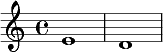

In [4]:
n1 = Note('e4')
n1.duration.type = 'whole'
n2 = Note('d4')
n2.duration.type = 'whole'
m1 = Measure()
m2 = Measure()
m1.append(n1)
m2.append(n2)
partLower = Part()
partLower.append(m1)
partLower.append(m2)
show(partLower)

<class 'music21.converter.subConverters.ConverterLilypond'>
<music21.note.Note C>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note D>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note E->
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note F>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note F>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note E->
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note D>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note C>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note C>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note D>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note E>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.

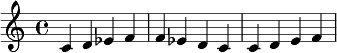

In [5]:
scales = [ scale.MelodicMinorScale('C'), scale.LocrianScale('D'), scale.MixolydianScale('G') ] 
part = Part()

ascending = True
currentPitch = Pitch('C4')
for s in scales:
    direction = 'ascending' if ascending else 'descending'
    currentPitch = currentPitch if isInScale(currentPitch, s) else s.next(currentPitch, stepSize=1, direction=direction)
    part.append(Note(currentPitch))
    for i in range(0, 3):
        currentPitch = s.next(currentPitch, direction=direction)
        part.append(Note(currentPitch))
    ascending = not ascending
    
show(part)

In [6]:
scale.MajorScale('E-').getPitches('E4', 'A-4')

[<music21.pitch.Pitch F4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch A-4>]

music21.stream.Part

<class 'music21.converter.subConverters.ConverterLilypond'>
<music21.note.Note C>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note D>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note E>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note F>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note G>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note A>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note B>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note C>
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')


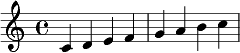

In [7]:
# Can notes be put directly into a stream?
part = Part()
majorScale = scale.MajorScale('C')
pitches = majorScale.getPitches()
for pitch in pitches:
    part.append(Note(pitch))
display(type(part))
show(part)

{0.0} <music21.metadata.Metadata object at 0x109ed3190>
{0.0} <music21.stream.Part Lead sheet>
    {0.0} <music21.instrument.Instrument P1: Lead sheet: >
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.bar.Barline style=double>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of B- major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.harmony.ChordSymbol Em7 alter b5>
        {0.0} <music21.note.Note B->
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.harmony.ChordSymbol A7 add b9>
        {0.0} <music21.note.Note B->
    {8.0} <music21.stream.Measure 3 offset=8.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.harmony.ChordSymbol Cm7>
        {0.0} <music21.note.Note B->
    {12.0} <music21.stream.Measure 4 offset=12.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.ha

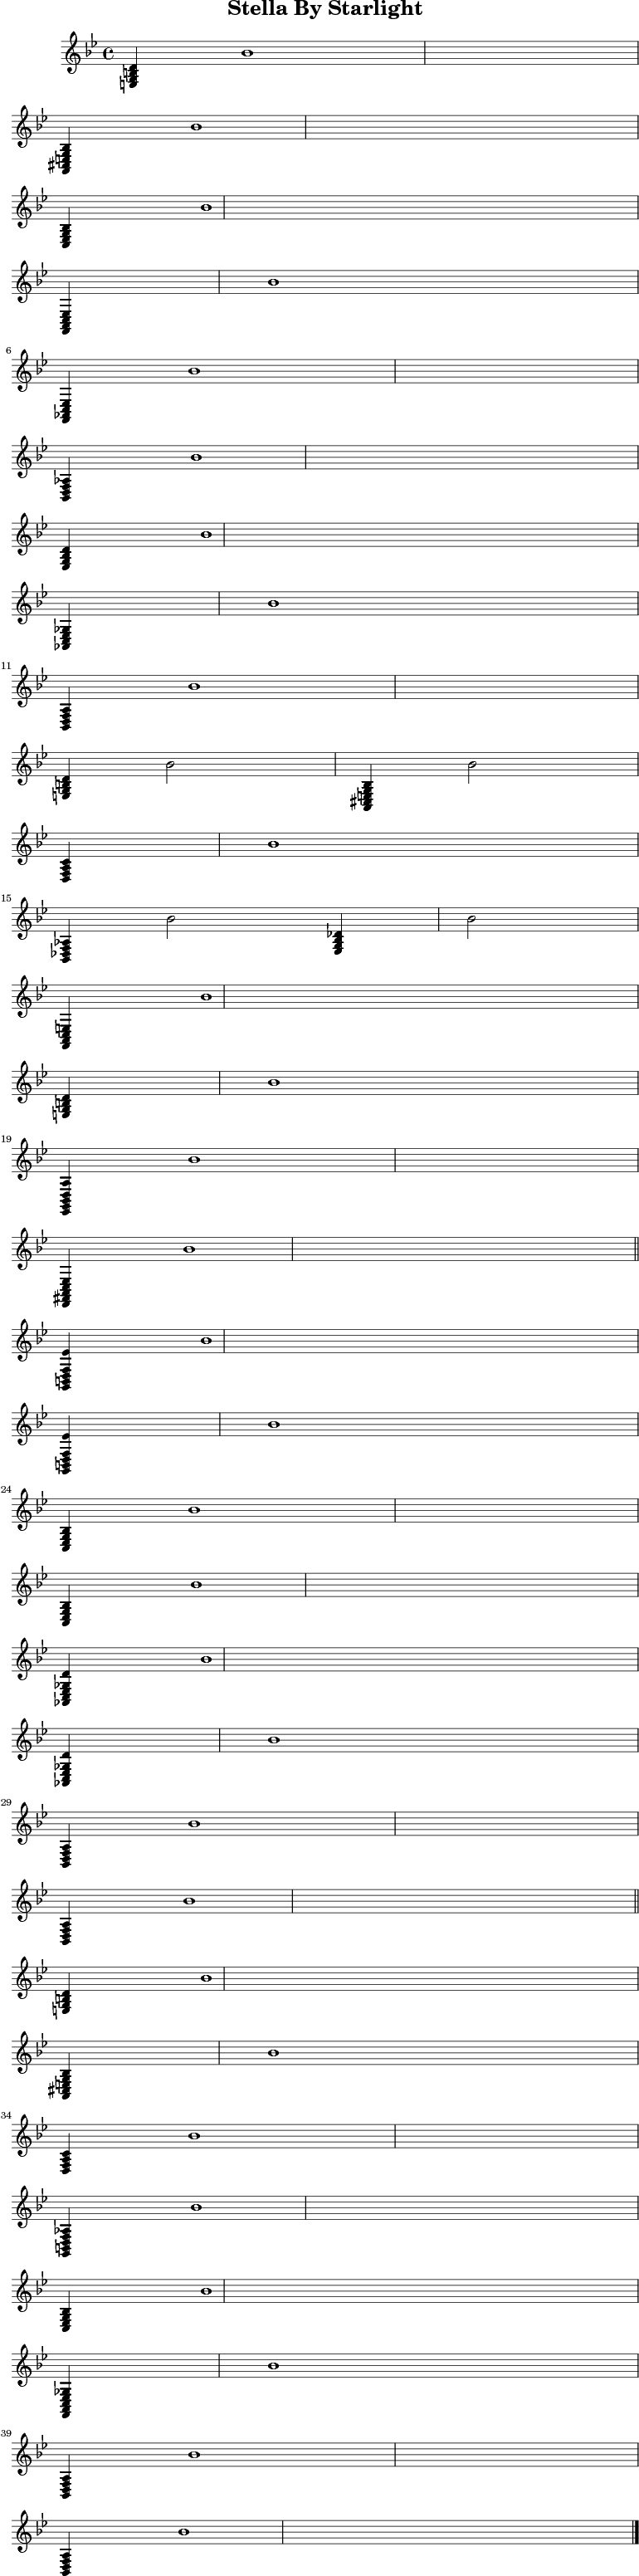

In [8]:
# Import MusicXML
reload(music21)
testChartsPath = '../test/charts/'
chartName = 'StellaByStarlight.xml'
score = converter.parseFile(os.path.join(testChartsPath, chartName))
music21.harmony.realizeChordSymbolDurations(score)
part = score.parts[0]
measures = part.getElementsByClass('Measure')



# show(score, 'text')
# score.show('oldmusicxml')
# show(score)
# xml = music21.musicxml.m21ToXml.GeneralObjectExporter().parse(score)
# xml
# with open('StellaOut.xml', 'w') as f:
#     f.write(xml)
score.show('text')
show(score)

<class 'music21.converter.subConverters.ConverterLilypond'>
P1: Lead sheet: 
('Instrument', 'Music21Object', 'object')
<music21.stream.Measure 1 offset=0.0>
('Measure', 'Stream', 'StreamCoreMixin', 'Music21Object', 'object')
<music21.layout.SystemLayout>
('SystemLayout', 'LayoutBase', 'Music21Object', 'object')
<music21.bar.Barline style=double>
('Barline', 'Music21Object', 'object')
<music21.clef.TrebleClef>
('TrebleClef', 'GClef', 'PitchClef', 'Clef', 'Music21Object', 'object')
B- major
('Key', 'KeySignature', 'DiatonicScale', 'ConcreteScale', 'Scale', 'Music21Object', 'object')
<music21.meter.TimeSignature 4/4>
('TimeSignature', 'Music21Object', 'object')
<music21.harmony.ChordSymbol Em7 alter b5>
('ChordSymbol', 'Harmony', 'Chord', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.note.Note B->
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')
<music21.stream.Measure 2 offset=4.0>
('Measure', 'Stream', 'StreamCoreMixin', 'Music21Object', 'object')
<music21.l

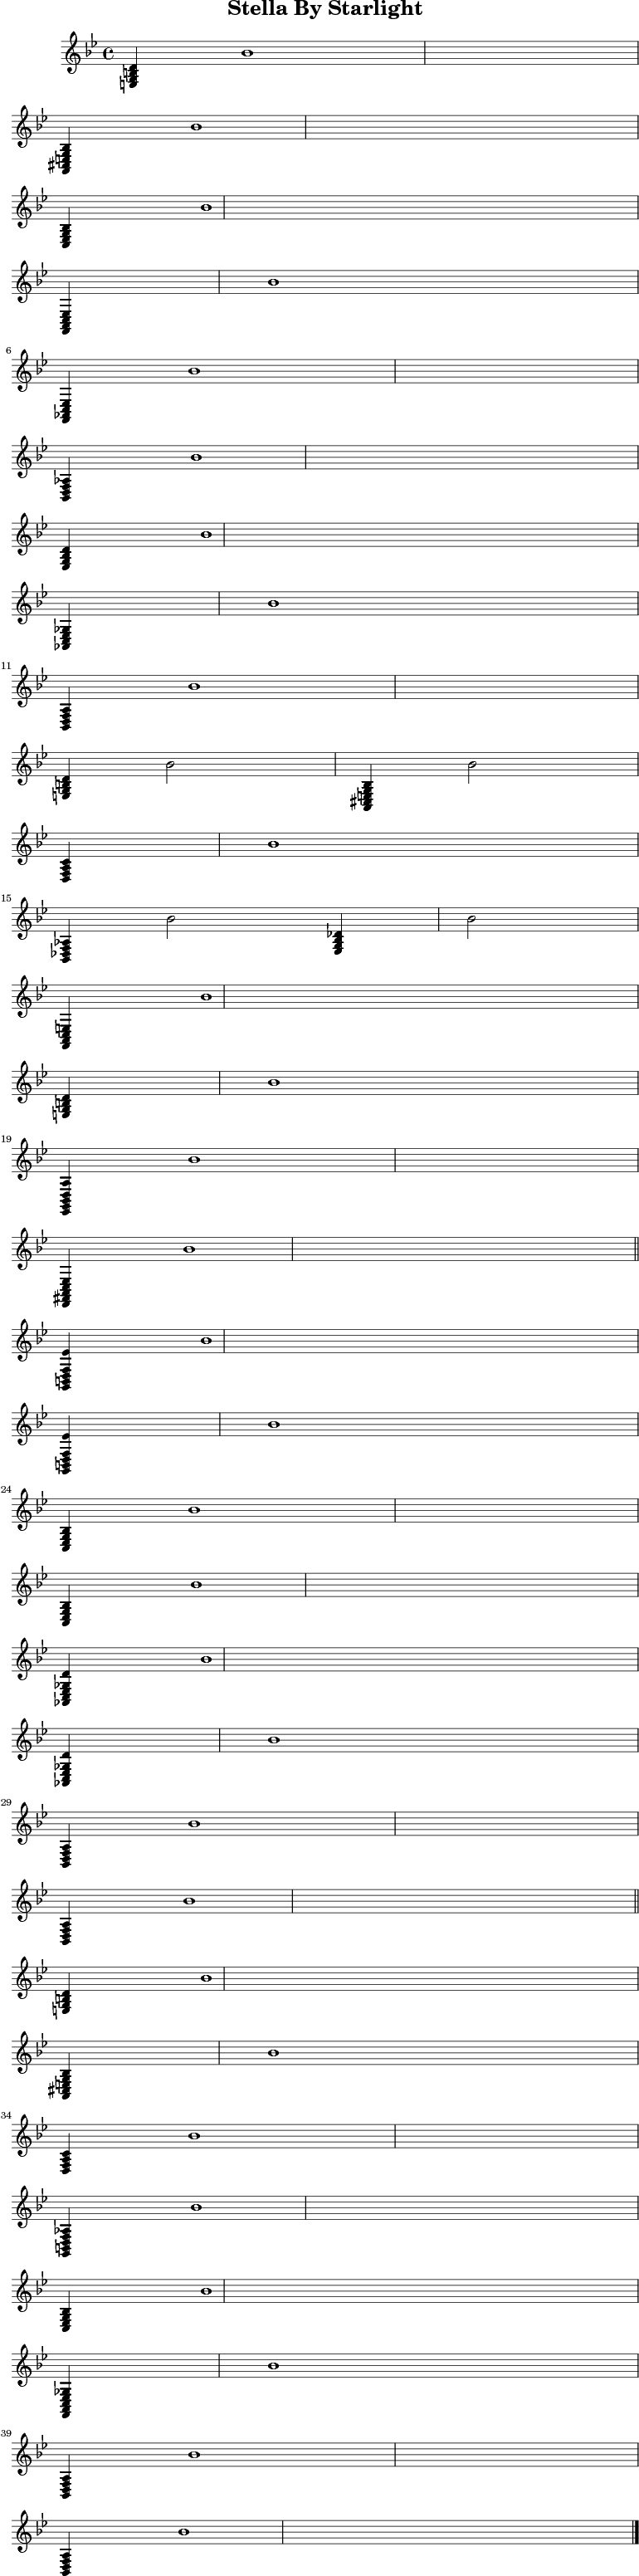

In [9]:
score = readMusicXml('StellaByStarlight.xml')
# score.remove(score.getElementsByClass('Note'))

parts = score.flat.getElementsByClass('Part')
measures = score.flat.getElementsByClass('Measure')
notes = score.flat.getElementsByClass('Note')

# removeNotesFromScore(score)
show(score)

In [10]:
import music21
music21.__file__


'/Users/gpascale/anaconda/envs/jupyterEnv/lib/python2.7/site-packages/music21/__init__.pyc'